# Ultimate Technologies Inc. <a id='2_Data_wrangling'></a>

## Part 1 ‐ Exploratory data analysis<a id='2.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
plt.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
sns.set()

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [2]:
df = pd.read_json(r'C:\Users\bayar\Downloads\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\logins.json')

In [3]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
import  warnings
warnings.simplefilter('ignore')

In [6]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [7]:
# Aggregating login counts based on 15 minute time intervals.
df.set_index('login_time', inplace=True)
df['count'] = 1
df.sort_index(inplace=True)
df_agg = df.resample("15min").sum()

In [8]:
df_agg.head()


,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


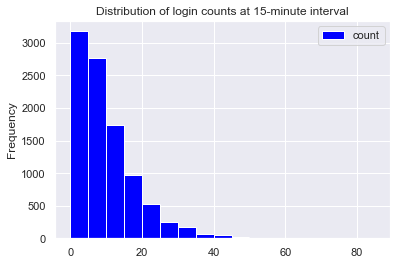

In [9]:
df_agg.plot(kind='hist',bins=np.arange(0,90,5),color='blue',title="Distribution of login counts at 15-minute interval")
plt.show()

# understand the basic distribution of login counts at 15-minute intervals
#df_15['count'].plot(kind='hist',bins=np.arange(0,90,5),color='blue',title="Distribution of login counts at 15-minute interval");
#plt.xlabel("# of logins within the 15-minute interval");
#plt.ylabel("Counts");

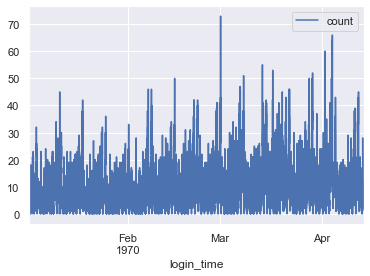

In [10]:
df_agg.plot()
plt.show()

## Part 2 ‐ Experiment and metrics design<a id='2.3_Imports'></a>

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

**Answer**:
To encourage driver availability in both cities, the Ultimate managers of city operations have proposed an experiment involving toll cost reimbursement. Several metrics could be tracked during this experiment, including total reimbursement, driver travel patterns, and time spent by drivers in both cities. Given that toll reimbursement aims to boost driver presence in both cities, leading to increased passenger trips and higher profits for the company, I would select passenger trip counts as the key metric to gauge the experiment's success. In an ideal scenario, successful toll cost reimbursement would result in a significant rise in passenger trip counts, whereas an unsuccessful attempt would show minimal change in passenger trip counts.

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

**Answer**:
To conduct the experiment, the following steps will be taken:

In advance, notify drivers that starting from the first day of the upcoming month, Ultimate will reimburse toll expenses for trips without passengers between the two cities. Additionally, communicate the observed patterns based on historical data: on weekdays, Ultimate Gotham experiences heightened activity at night, while Ultimate Metropolis is busiest during the day. Notably, both cities display reasonable activity levels on weekends.

Over the course of one month, continue data collection as usual, incorporating an additional metric: reimbursements made to each individual driver.

At the end of the month, analyze the collected data to determine one of the following outcomes: a) the toll reimbursement operation proves successful; b) the operation yields unfavorable results; or c) the experiment requires an extended observation period for conclusive findings.

b) what statistical test(s) you will conduct to verify the significance of the observation

**Answer**:
Time Series Analysis: Evaluate changes in passenger trip counts from previous months, factoring out seasonal trends. This assumes no major outliers like Gotham Olympics or Metropolis lockdowns.

Hypothesis Testing: Compare driver groups—reimbursed and non-reimbursed—using a t-test to identify significant differences in passenger trip counts. The resulting p-value indicates significance.

Regression: Assess toll reimbursement impact on trip counts through regression, considering it as a numerical variable. Assumptions include uniform toll costs, sporadic bridge usage, and a nominal value for non-crossers.

c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**Answer**:
Based on the analysis outcome, I might propose the continuation of toll reimbursement by Ultimate if a notable shift in 'counts of passenger trips' is detected and linked to toll reimbursement.

Alternatively, I might advise discontinuing toll reimbursement if there is no evident alteration in 'counts of passenger trips'.

In the event of inconclusive results, I would suggest implementing suitable adjustments and extending the monitoring period (e.g., a total of 3 months). This would facilitate a more informed decision on whether to persist with cost reimbursement and how to proceed.

## Part 3 ‐ Predictive modeling<a id='2.3_Imports'></a>

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekda


In [11]:
df_2 = pd.read_json(r'C:\Users\bayar\Downloads\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\ultimate_data_challenge.json')

In [12]:
df_2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Part 3.1 ‐ Data cleaning, exploratory analysis and visualizations.<a id='2.3_Imports'></a>

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [14]:
# fill in missing values
df_2['avg_rating_of_driver'] = df_2['avg_rating_of_driver'].fillna(df_2['avg_rating_of_driver'].mean())
df_2['avg_rating_by_driver'] = df_2['avg_rating_by_driver'].fillna(df_2['avg_rating_by_driver'].mean())
df_2['phone'] = df_2['phone'].fillna('NA')

In [15]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [16]:
# convert date-related columns to datetime format
df_2['last_trip_date'] = pd.to_datetime(df_2.last_trip_date, format='%Y-%m-%d')
df_2['signup_date'] = pd.to_datetime(df_2.signup_date, format='%Y-%m-%d')

In [17]:
# check on categorical column
print("---\n",df_2.city.value_counts())#dropna=False
print("---\n",df_2.phone.value_counts())
print("---\n",df_2.ultimate_black_user.value_counts())

---
 Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64
---
 iPhone     34582
Android    15022
NA           396
Name: phone, dtype: int64
---
 False    31146
True     18854
Name: ultimate_black_user, dtype: int64


In [18]:
# check on datetime columns
print("---\n", df_2['last_trip_date'].describe())
print("---\n", df_2['signup_date'].describe())

assert len(df_2[df_2.last_trip_date < df_2.signup_date]) == 0

---
 count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object
---
 count                   50000
unique                     31
top       2014-01-18 00:00:00
freq                     2948
first     2014-01-01 00:00:00
last      2014-01-31 00:00:00
Name: signup_date, dtype: object


As depicted, the 'signup_date' falls within the range of '2014-01-01 00:00:00' and '2014-01-31 00:00:00', signifying that all users are part of the January 2014 cohort.

The most recent entry in the 'last_trip_date' column is '2014-07-01 00:00:00'. It is presumed that the data was retrieved immediately after '2014-07-01 00:00:00', marking a six-month interval following the initial January 2014 sign-ups.

In case when data is pulled right after '2014-07-01 00:00:00' then a user is considered 'retained' if a trip was taken place within 30 days prior to 2014-07-01.

In [19]:
# compute the cutoff time for determing user retention
cutoff = df_2.last_trip_date.max() - pd.Timedelta('30 days')
cutoff

Timestamp('2014-06-01 00:00:00')

In [20]:
# determine if a user is retained based on the cutoff time
df_2['retained'] = df_2.last_trip_date.apply(lambda x: True if x >= cutoff else False)

In [21]:
# determine if a user is retained based on the cutoff time
df_2['retained'] = df_2.last_trip_date.apply(lambda x: True if x >= cutoff else False)

In [22]:
# compute the fraction of user retained
df_2.retained.sum()/len(df_2)

0.37608

As indicated, a retention rate of 37.61% is observed among users who registered in January 2014, six months later.

In [23]:
# Overview of retained vs. non-retained
retained = df_2.groupby('retained')
retained.mean()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
retained,,,,,,,,
False,1.658482,4.606309,1.075339,8.666739,0.299942,60.647032,6.207939,4.787415
True,3.306318,4.593679,1.073809,9.152797,0.505052,61.389034,5.114788,4.762801


In [24]:
df_2.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


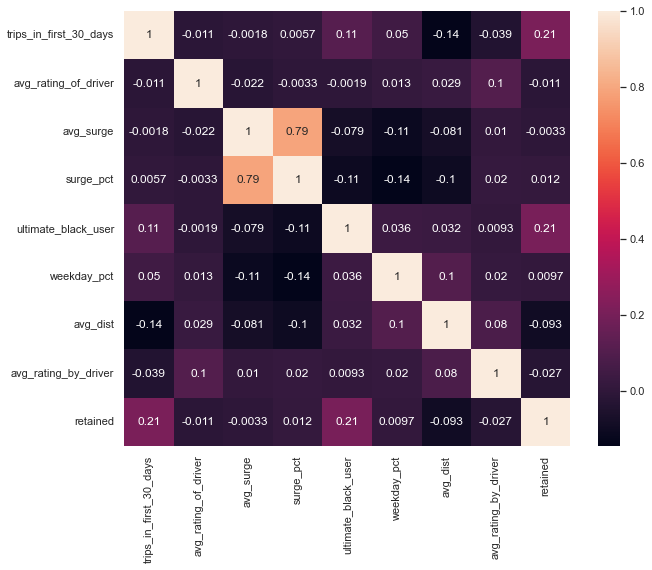

In [25]:
# Correlation of user retention and numerical variables
# Increase the size of the heatmap
plt.figure(figsize=(10, 8))

# Correlation of user retention and numerical variables
sns.heatmap(df_2.corr(), annot=True)

# Show the plot
plt.show()

In the realm of numerical variables, 'trips_in_first_30_days' and 'ultimate_black_user' exhibit the strongest positive correlation, while 'trips_in_first_30_days' and 'avg_dist' emerges as the most prominent negatively correlated variable.

Remaining numerical variables demonstrate only modest correlations, encompassing the 'avg_rating_by_driver' and avg_rating_of_driver' columns.

city
Astapor           0.255715
King's Landing    0.628134
Winterfell        0.351945
Name: retained, dtype: float64


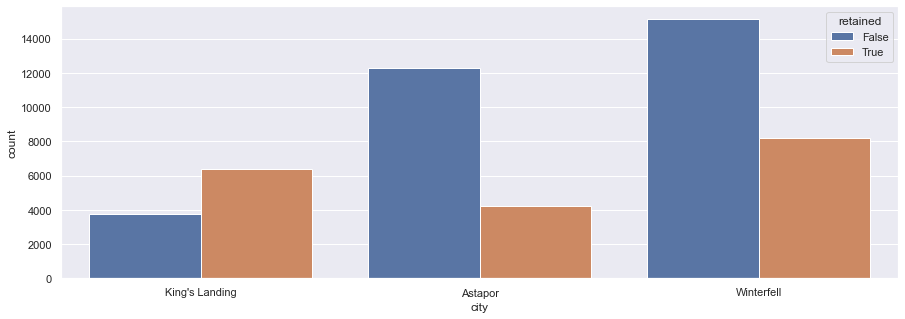

In [26]:
# correlation between 'retained' and 'city'
plt.figure(figsize=(15,5))
sns.countplot(x='city', data=df_2, hue='retained')
print(df_2.groupby(df_2.city)['retained'].mean())

The correlation between user retention and the city of signup is notable: King's Landing shows the highest retention rate among the three cities, while Astapor demonstrates the lowest correlated user retention.

phone
Android    0.209426
NA         0.335859
iPhone     0.448933
Name: retained, dtype: float64


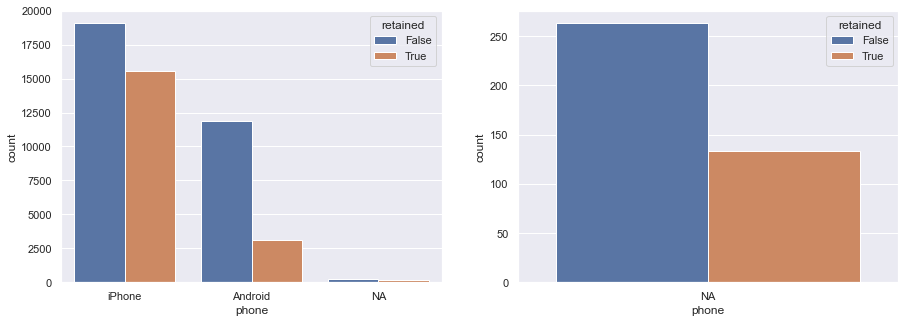

In [27]:
# correlation between 'retained' and 'phone'
plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.countplot(x='phone', data=df_2, hue='retained',ax=ax1);
ax2 = plt.subplot(1,2,2)
sns.countplot(x='phone', data=df_2[df_2.phone == 'NA'], hue='retained',ax=ax2);
print(df_2.groupby(df_2.phone)['retained'].mean())

There is a robust correlation between user retention and the phone type utilized: iPhone users exhibit a significantly higher retention rate (44.9%) compared to Android users (20.9%). Conversely, users without available phone information fall in the middle range with a retention rate of 33.6%.

signup_date
0    0.387984
1    0.376073
2    0.376645
3    0.360115
4    0.370533
5    0.380453
6    0.384687
Name: retained, dtype: float64


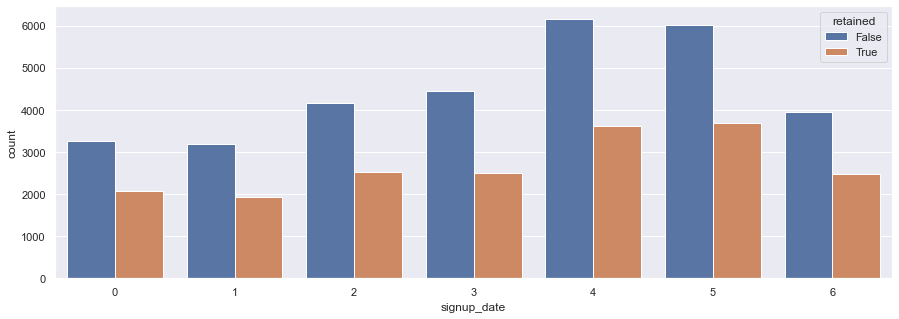

In [28]:
# correlation between 'retained' and 'day of the week' the user signed up
plt.figure(figsize=(15,5))
sns.countplot(x=df_2.signup_date.dt.dayofweek, data=df_2, hue='retained');
print(df_2.groupby(df_2.signup_date.dt.dayofweek)['retained'].mean())

As indicated, the day of the week when signup occurred appears to have minimal impact on the user retention rate.

### Part 3.2 ‐ Modeling<a id='2.3_Imports'></a>

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [29]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  retained                50000 non-null  bool  

Given the dataset's limited dimensionality, there is no requirement to employ techniques like PCA for dimensionality reduction. Instead, we will utilize the Random Forest Classifier, a potent predictive tool that also provides insights into feature importance and Linear Logistic Regression for comparison.

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score

In [31]:
# set up X and y
X = pd.get_dummies(df_2.drop('retained', axis=1), drop_first=True)
X = X.drop(['signup_date', 'last_trip_date'], axis=1)
y = df_2.retained

X.head(5)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_NA,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,1,0,0


In [32]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.25, random_state=42)

In [42]:
# initiate the score table
index = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier']
score_table = pd.DataFrame(index = index, columns= ['accuracy_train','f1_score_train','accuracy_test','f1_score_test'])

# define function for plotting the results
def compute_log_result(algo, pred_train, pred_test):
    """compute and log the performance for both training and test sets"""
    
    # compute the performance  
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    
    # log the performance
    score_table.loc[algo,:] = accuracy_train, f1_train, accuracy_test, f1_test
    
    # compute confusion matrix and print
    print("Classification results based on the testset:\n", classification_report(y_test, pred_test))

In [43]:
# Logistic Regression model with default parameters

logit = Pipeline([('scaler', StandardScaler()),('logit',LogisticRegression())])
logit.fit(X_train, y_train)
pred_train = logit.predict(X_train)
pred_test = logit.predict(X_test)

# logging of model performance
compute_log_result("LogisticRegression", pred_train, pred_test)

Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.74      0.85      0.79      7799
        True       0.67      0.50      0.57      4701

    accuracy                           0.72     12500
   macro avg       0.70      0.67      0.68     12500
weighted avg       0.71      0.72      0.71     12500



In [44]:
# Random Forest model with default parameters

rfc = Pipeline([('scaler', StandardScaler()),('rfc', RandomForestClassifier(class_weight='balanced'))]) # set class_weight='balanced' to adjust for the imbalanced classes
rfc.fit(X_train, y_train)
pred_train = rfc.predict(X_train)
pred_test = rfc.predict(X_test)

compute_log_result("RandomForestClassifier", pred_train, pred_test)

Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.80      0.82      0.81      7799
        True       0.69      0.66      0.67      4701

    accuracy                           0.76     12500
   macro avg       0.74      0.74      0.74     12500
weighted avg       0.76      0.76      0.76     12500



In [37]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Decision Tree Model
dtree = DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

# logging of model performance
compute_log_result("DecisionTreeClassifier", pred_train, pred_test)

Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.82      0.80      0.81      7799
        True       0.67      0.70      0.69      4701

    accuracy                           0.76     12500
   macro avg       0.75      0.75      0.75     12500
weighted avg       0.76      0.76      0.76     12500



In [46]:
# GradientBoosting model with default parameters

gbc = Pipeline([('scaler', StandardScaler()),('gbc', GradientBoostingClassifier())]) # set class_weight='balanced' to adjust for the imbalanced classes
gbc.fit(X_train, y_train)
pred_train = gbc.predict(X_train)
pred_test = gbc.predict(X_test)

compute_log_result("GradientBoostingClassifier", pred_train, pred_test)

Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.81      0.86      0.84      7799
        True       0.74      0.67      0.71      4701

    accuracy                           0.79     12500
   macro avg       0.78      0.77      0.77     12500
weighted avg       0.79      0.79      0.79     12500



In [47]:
print(score_table)

                           accuracy_train f1_score_train accuracy_test  \
LogisticRegression               0.718027       0.570302       0.71656   
DecisionTreeClassifier           0.761573       0.690291       0.76128   
RandomForestClassifier             0.9968       0.995745       0.75976   
GradientBoostingClassifier        0.78896       0.703039       0.78944   

                           f1_score_test  
LogisticRegression              0.568401  
DecisionTreeClassifier           0.68949  
RandomForestClassifier          0.673409  
GradientBoostingClassifier      0.705527  


Among the four models, the Gradient Boosting Classifier demonstrated superior performance. Therefore, we will proceed with utilizing the Gradient Boosting model.

In [41]:
# Grid search of parameters n_estimators and max_features to improve GradientBoostingClassifer model
parameters = {'gbc__n_estimators': np.arange(500,1000,100), 'gbc__max_features':[None,'sqrt','log2']}
gbc_cv = GridSearchCV(gbc, parameters, scoring='accuracy', cv=5)
gbc_cv.fit(X_train, y_train)
print('Best parameters:', gbc_cv.best_params_)
print('Corresponding accuracy score:', gbc_cv.best_score_)

Best parameters: {'gbc__max_features': None, 'gbc__n_estimators': 900}
Corresponding accuracy score: 0.7890666666666666


In [48]:
# updated GradientBoostingClassifier model with the optimized parameter
gbc = Pipeline([('scaler', StandardScaler()),('gbc', GradientBoostingClassifier(n_estimators=700, max_features='sqrt'))])
gbc.fit(X_train, y_train)
pred_train = gbc.predict(X_train)
pred_test = gbc.predict(X_test)

compute_log_result("GradientBoostingClassifier", pred_train, pred_test)

Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.82      0.86      0.84      7799
        True       0.75      0.68      0.71      4701

    accuracy                           0.79     12500
   macro avg       0.78      0.77      0.78     12500
weighted avg       0.79      0.79      0.79     12500



In [49]:
# final results
print(score_table.loc['GradientBoostingClassifier'])

# feature importance ranking from the optimized GradientBoostingClassifier 
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': gbc.named_steps.gbc.feature_importances_})
print(feature_rank.sort_values(by='importance',ascending=False))

accuracy_train    0.803627
f1_score_train    0.723988
accuracy_test      0.79352
f1_score_test     0.711394
Name: GradientBoostingClassifier, dtype: object
                   feature  importance
7     avg_rating_by_driver    0.225829
8      city_King's Landing    0.163645
5              weekday_pct    0.145773
2                avg_surge    0.112009
11            phone_iPhone    0.087869
4      ultimate_black_user    0.070361
3                surge_pct    0.065401
0   trips_in_first_30_days    0.059445
6                 avg_dist    0.032024
1     avg_rating_of_driver    0.019105
9          city_Winterfell    0.017024
10                phone_NA    0.001515


### Part 3.3 ‐ Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).<a id='2.3_Imports'></a>

The avg_rating_by_driver serves as an indicator of whether a user will be retained after six months. To enhance user retention rates, Ultimate should prioritize users who receive higher ratings from drivers.

Users who signed up in King's Landing exhibit a greater retention rate compared to the other two cities. Ultimate could explore the reasons behind this discrepancy and tailor distinct strategies for each city.

Analysis underscores the significance of weekday ride percentages in influencing retention rates. Therefore, Ultimate could explore additional measures to retain users who frequently ride during weekdays.